# Part I - Prosper Loan Analysis
## by Mattias Johansson

## Introduction
"This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others." - https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub

This report aims to find correlations/causations between interesting parameters. 

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
%matplotlib inline

# Load data

In [2]:
os.listdir("data")
df = pd.read_csv("data/prosperLoanData.csv")
df.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df = df[["ListingKey","ListingNumber","ListingCreationDate","Term","LoanStatus","LoanNumber","BorrowerAPR","BorrowerRate","LenderYield","BorrowerState","Occupation","EmploymentStatus","EmploymentStatusDuration","IsBorrowerHomeowner","DateCreditPulled","CreditScoreRangeLower","CreditScoreRangeUpper","FirstRecordedCreditLine","DebtToIncomeRatio","IncomeRange","StatedMonthlyIncome","LoanKey","LoanMonthsSinceOrigination","LoanOriginalAmount","LoanOriginationDate","LoanOriginationQuarter","MonthlyLoanPayment","PercentFunded","Recommendations","InvestmentFromFriendsCount","InvestmentFromFriendsAmount","Investors"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ListingKey                   113937 non-null  object 
 1   ListingNumber                113937 non-null  int64  
 2   ListingCreationDate          113937 non-null  object 
 3   Term                         113937 non-null  int64  
 4   LoanStatus                   113937 non-null  object 
 5   LoanNumber                   113937 non-null  int64  
 6   BorrowerAPR                  113912 non-null  float64
 7   BorrowerRate                 113937 non-null  float64
 8   LenderYield                  113937 non-null  float64
 9   BorrowerState                108422 non-null  object 
 10  Occupation                   110349 non-null  object 
 11  EmploymentStatus             111682 non-null  object 
 12  EmploymentStatusDuration     106312 non-null  float64
 13 

In [5]:
# We filter out the nan values to work with a complete dataset. This may affect the analysis
pd.set_option('display.max_columns', None)
df = df.dropna().reset_index(drop=True)
df[0:50]

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,LoanNumber,BorrowerAPR,BorrowerRate,LenderYield,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanKey,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,19141,0.16516,0.1580,0.1380,CO,Other,Self-employed,2.0,True,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,0.17,"$25,000-49,999",3083.333333,E33A3400205839220442E84,78,9425,2007-09-12 00:00:00,Q3 2007,330.43,1.0000,0,0,0.00,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,134815,0.12016,0.0920,0.0820,CO,Professional,Employed,44.0,False,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,0.18,"$50,000-74,999",6125.000000,9E3B37071505919926B1D82,0,10000,2014-03-03 00:00:00,Q1 2014,318.93,1.0000,0,0,0.00,1
2,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,77296,0.12528,0.0974,0.0874,GA,Skilled Labor,Employed,113.0,True,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,0.15,"$25,000-49,999",2875.000000,A0393664465886295619C51,16,10000,2012-11-01 00:00:00,Q4 2012,321.45,1.0000,0,0,0.00,158
3,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,102670,0.24614,0.2085,0.1985,MN,Executive,Employed,44.0,True,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,0.26,"$100,000+",9583.333333,A180369302188889200689E,6,15000,2013-09-20 00:00:00,Q3 2013,563.97,1.0000,0,0,0.00,20
4,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,60,Current,123257,0.15425,0.1314,0.1214,NM,Professional,Employed,82.0,True,2013-12-14 08:26:40,740.0,759.0,1973-03-01 00:00:00,0.36,"$100,000+",8333.333333,C3D63702273952547E79520,3,15000,2013-12-24 00:00:00,Q4 2013,342.37,1.0000,0,0,0.00,1
5,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,36,Current,88353,0.31032,0.2712,0.2612,KS,Sales - Retail,Employed,172.0,False,2013-04-12 09:52:53,680.0,699.0,2000-09-29 00:00:00,0.27,"$25,000-49,999",2083.333333,CE963680102927767790520,11,3000,2013-04-18 00:00:00,Q2 2013,122.67,1.0000,0,0,0.00,1
6,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,36,Current,90051,0.23939,0.2019,0.1919,CA,Laborer,Employed,103.0,False,2013-05-05 06:49:25,700.0,719.0,1999-02-25 00:00:00,0.24,"$25,000-49,999",3355.750000,0C87368108902149313D53B,10,10000,2013-05-13 00:00:00,Q2 2013,372.60,1.0000,0,0,0.00,1
7,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,36,Current,121268,0.07620,0.0629,0.0529,IL,Food Service,Employed,269.0,True,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,0.25,"$25,000-49,999",3333.333333,02163700809231365A56A1C,3,10000,2013-12-12 00:00:00,Q4 2013,305.54,1.0000,0,0,0.00,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,36,Current,121268,0.07620,0.0629,0.0529,IL,Food Service,Employed,269.0,True,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,0.25,"$25,000-49,999",3333.333333,02163700809231365A56A1C,3,10000,2013-12-12 00:00:00,Q4 2013,305.54,1.0000,0,0,0.00,1
9,0F123545674891886D9F106,587746,2012-05-10 07:04:01.577000000,60,Current,65946,0.27462,0.2489,0.2389,MD,Fireman,Employed,300.0,False,2012-04-22 08:38:09,640.0,659.0,1989-11-29 00:00:00,0.12,"$75,000-99,999",7500.000000,7C083651269973612460D6D,22,13500,2012-05-17 00:00:00,Q2 2012,395.37,1.0000,0,0,0.00,19


### What is the structure of your dataset?

> The dataset contains quantitative and qualitative variables together with ordinal, categorical and interval variables, where a lot of the variables have missing values. Some of the missing values is present as they were not applicable for loans that originated before july 2009, together with missing input data related to not applicable values for certain categories. 

### What is/are the main feature(s) of interest in your dataset?

> The features of interest is specifically focused on the loan, mortgage & interest, income related variables, life situation(e.g., occupation/employment status), where the loan heritages from etc.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following table presents the selected variables. Initially not all will be used, as its to much to process for this report, but for documentation i will explore and try to narrow the table down.

| Variables                   	|   	|
|-----------------------------	|---	|
| ListingKey                  	|   	|
| ListingNumber               	|   	|
| ListingCreationDate         	|   	|
| Term                        	|   	|
| LoanStatus                  	|   	|
| LoanNumber                  	|   	|
| BorrowerAPR                 	|   	|
| BorrowerRate                	|   	|
| LenderYield                 	|   	|
| BorrowerState               	|   	|
| Occupation                  	|   	|
| EmploymentStatus            	|   	|
| EmploymentStatusDuration    	|   	|
| IsBorrowerHomeowner         	|   	|
| DateCreditPulled            	|   	|
| CreditScoreRangeLower       	|   	|
| CreditScoreRangeUpper       	|   	|
| FirstRecordedCreditLine     	|   	|
| DebtToIncomeRatio           	|   	|
| IncomeRange                 	|   	|
| StatedMonthlyIncome         	|   	|
| LoanKey                     	|   	|
| LoanMonthsSinceOrigination  	|   	|
| LoanOriginalAmount          	|   	|
| LoanOriginationDate         	|   	|
| LoanOriginationQuarter      	|   	|
| MonthlyLoanPayment          	|   	|
| PercentFunded               	|   	|
| Recommendations             	|   	|
| InvestmentFromFriendsCount  	|   	|
| InvestmentFromFriendsAmount 	|   	|
| Investors                   	|   	|

## Univariate Exploration

## Question: 

> How is the original loan amount distributed?

## Visualization

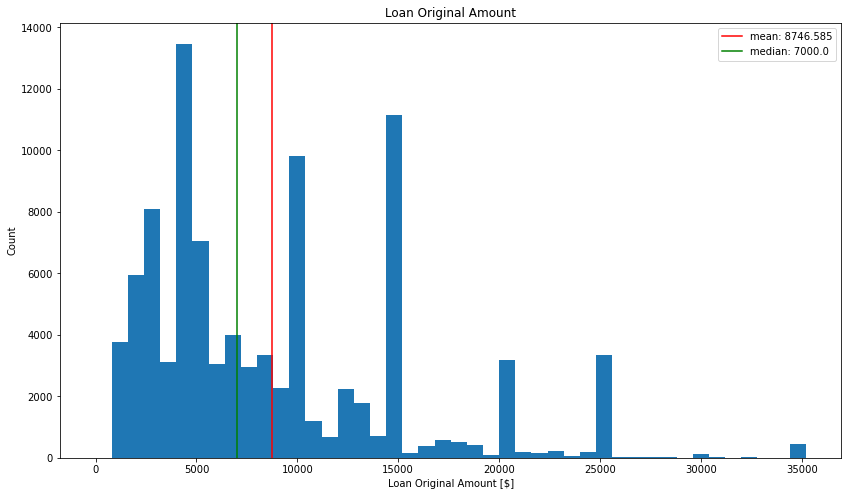

In [6]:
def histo(df, binsize, column, xlabel, ylabel, title):
    binsize = binsize
    bins = np.arange(0, df[column].max()+binsize, binsize)
    plt.figure(figsize=[14, 8])
    hist = plt.hist(data = df, x = column, bins = bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.axvline(np.mean(df[column]),color = "red",label = f"mean: {np.round(np.mean(df[column]),3)}")
    plt.axvline(np.median(df[column]),color = "green",label = f"median: {np.round(np.median(df[column]),3)}")
    plt.legend()
    plt.show()
    
histo(df=df, binsize = 800, column = "LoanOriginalAmount", xlabel = "Loan Original Amount [$]", ylabel = "Count", title = "Loan Original Amount")

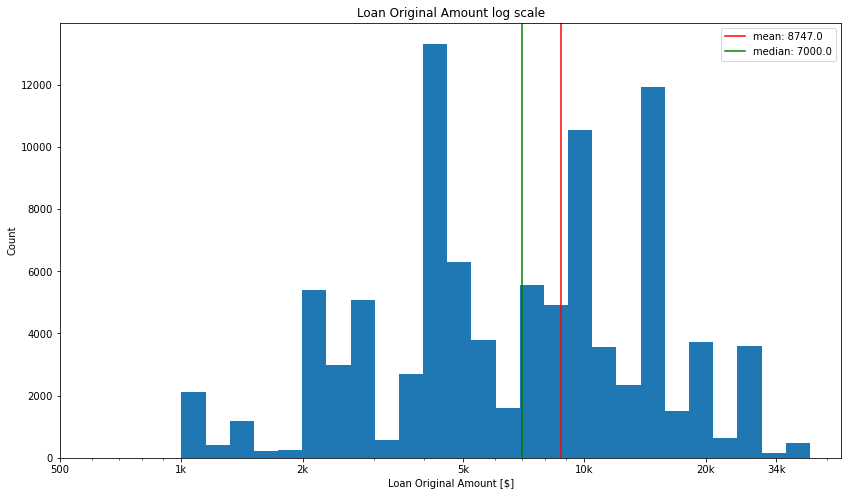

In [7]:
# Plot in log to easier see the distribution
def histo_log(df, column, xticks, xticks_name, xlabel, ylabel, title):
    log_binsize = 0.06
    bins = 10 ** np.arange(3, np.log10(df[column].max())+log_binsize, log_binsize)
    plt.figure(figsize=[14, 8])
    plt.hist(data = df, x = column, bins = bins)
    plt.xscale('log')
    plt.axvline(np.mean(df[column]),color = "red", label = f"mean: {np.round(np.mean(df[column]))}")
    plt.axvline(np.median(df[column]),color = "green",label = f"median: {np.round(np.median(df[column]))}")
    plt.xticks(xticks, xticks_name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()
    
histo_log(df = df, column = "LoanOriginalAmount", xticks =[500, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4], xticks_name=[500, '1k', '2k', '5k', '10k', '20k',"34k"], xlabel="Loan Original Amount [$]", ylabel= "Count", title="Loan Original Amount log scale")

### Observation

> We observe several densities around 5000, 10000, 15000, 20000, 25000 where a majority of the original loans are located.

> The log scaling visualizes the distibution as there are a relatively large right-tail

> The average is 8747 dollars loan at the original amount, and the median is 7000. Note that we must understand that we have larger distibutions in some specific areas, as mentioned before. 


## Question: 

> What is the distribution for the "outlier" / Large original loan takers related to Occupation, LoanStatus and EmploymentStatus?


## Visualization

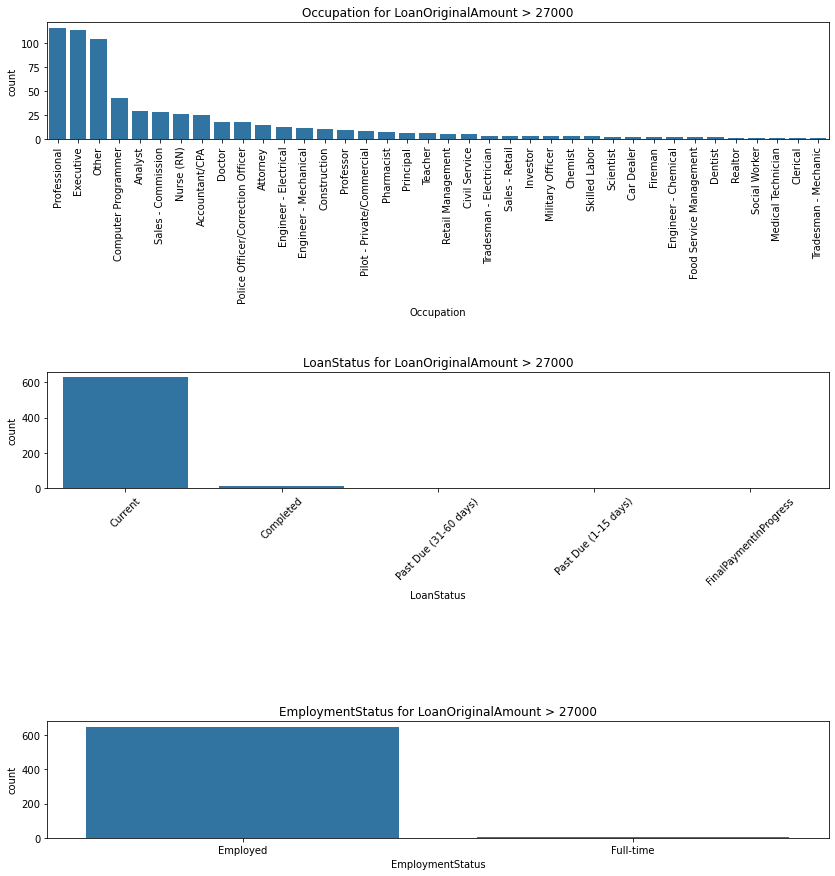

In [8]:
# Filtering on the larger original amount and looking at those cases
df_outliers = df[df["LoanOriginalAmount"] > 27000].copy()

def subplot_histogram_categorical(df):
    fig, ax = plt.subplots(nrows=3, figsize = [14,15])
    default_color = sb.color_palette()[0]
    plt.subplots_adjust(hspace=2)

    plot1 = sb.countplot(data = df, x = 'Occupation', color = default_color, ax = ax[0], order = df['Occupation'].value_counts().index)
    plot2 = sb.countplot(data = df, x = 'LoanStatus', color = default_color, ax = ax[1], order = df['LoanStatus'].value_counts().index)
    plot3 = sb.countplot(data = df, x = 'EmploymentStatus', color = default_color, ax = ax[2], order = df['EmploymentStatus'].value_counts().index)
    plot1.set_title('Occupation for LoanOriginalAmount > 27000')
    plot2.set_title('LoanStatus for LoanOriginalAmount > 27000')
    plot3.set_title('EmploymentStatus for LoanOriginalAmount > 27000')

    plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
    plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45)
    plot3.set_xticklabels(plot3.get_xticklabels(), rotation=0)
    plt.show()
    
subplot_histogram_categorical(df_outliers)

### Observation

> We observe when filtering large loan takers that all of them do have an employment of any kind. Mostly the also have these loans as active and the top Occupations are Professional, Excecutive, Other, Computer Programmer, and Analyst

## Question: 

> What is the distibution of the occupation, Loanstatus and employment status?


## Visualization

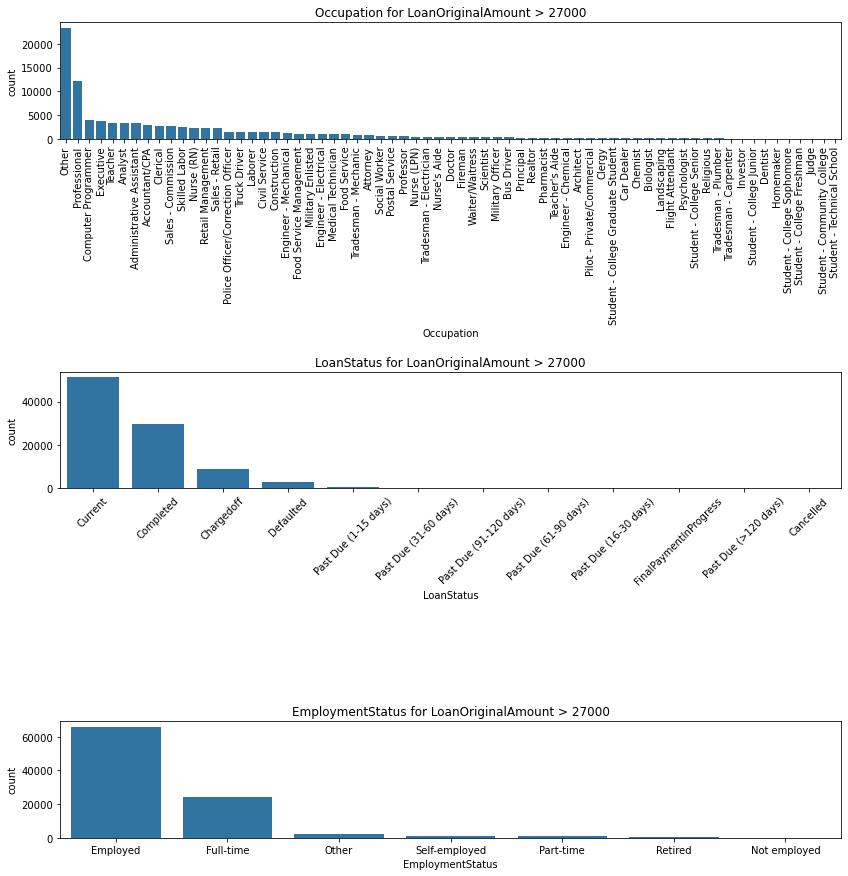

In [9]:
# Using the same function as before
subplot_histogram_categorical(df)

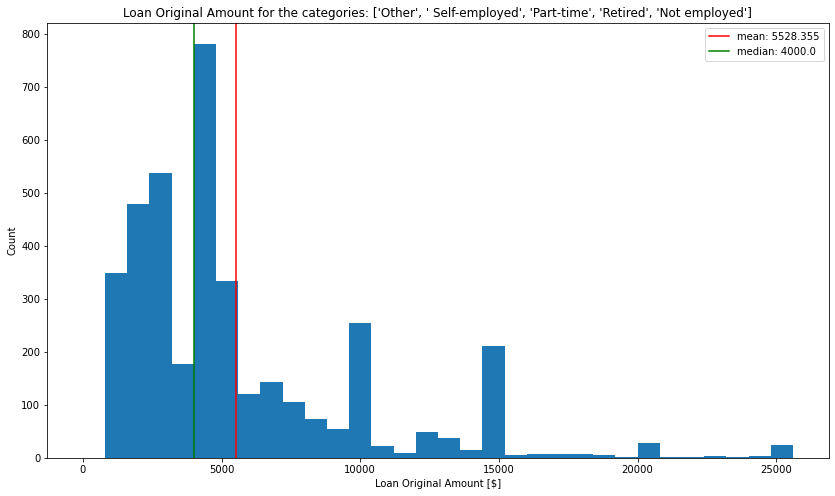

In [10]:
# Looking at the least occuring employment status and visualizing the distribution
cols = ["Other"," Self-employed","Part-time", "Retired","Not employed"]
df_employmentstatus = df[df["EmploymentStatus"].isin(cols)].copy()
histo(df=df_employmentstatus, binsize = 800, column = "LoanOriginalAmount", xlabel = "Loan Original Amount [$]", ylabel = "Count", title = f"Loan Original Amount for the categories: {cols}")

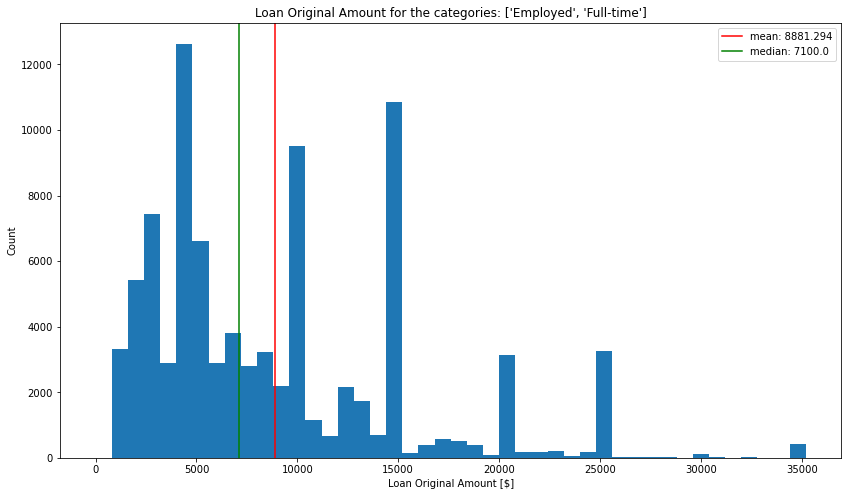

In [11]:
# Looking at the most occuring employment status and visualizing the distribution
cols = ["Employed", "Full-time"]
df_employmentstatus_full = df[df["EmploymentStatus"].isin(cols)].copy()
histo(df=df_employmentstatus_full, binsize = 800, column = "LoanOriginalAmount", xlabel = "Loan Original Amount [$]", ylabel = "Count", title = f"Loan Original Amount for the categories: {cols}")

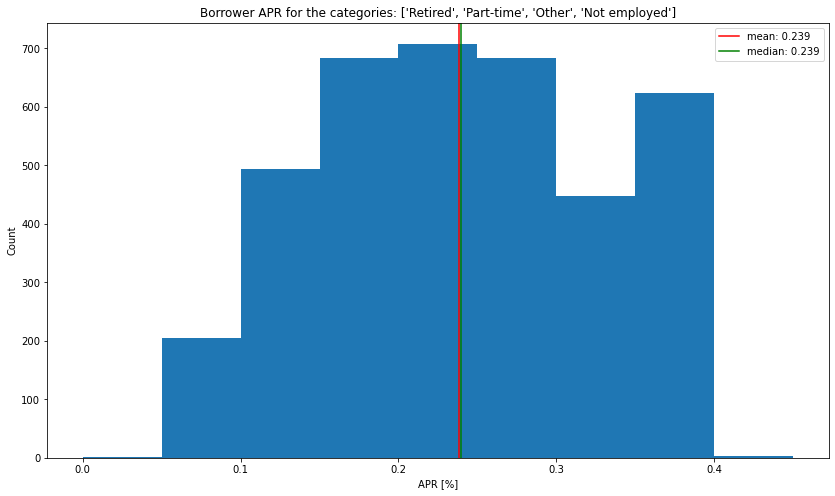

In [12]:
# Looking at the Borrower APR for the least occuring employments
histo(df=df_employmentstatus, binsize = 0.05, column = "BorrowerAPR", xlabel = "APR [%]", ylabel = "Count", title = f"Borrower APR for the categories: {list(set(df_employmentstatus.EmploymentStatus))}")

### Observation

> The non-informational category "Other" in the "Occupation" variable are among the top loan takers in this dataset. The category Professional, Computer programmer, Executive, Teacher and Analyst are among the top 5 loan takers.

> The majority of the status of the loans are "Current" and "Completed".

> Most of the loan takers are employed and/or working full-time. 

> The mean loan of the least occuring employment statuses is 5528 while the median is 4000. This is near half of the categories of the employed categorized loans

> The mean APR of the least occuring employment statuses is lower than the employed loan takers.

## Question

> Do full-time workers have lower borrower rate than unemployed?

## Visualization

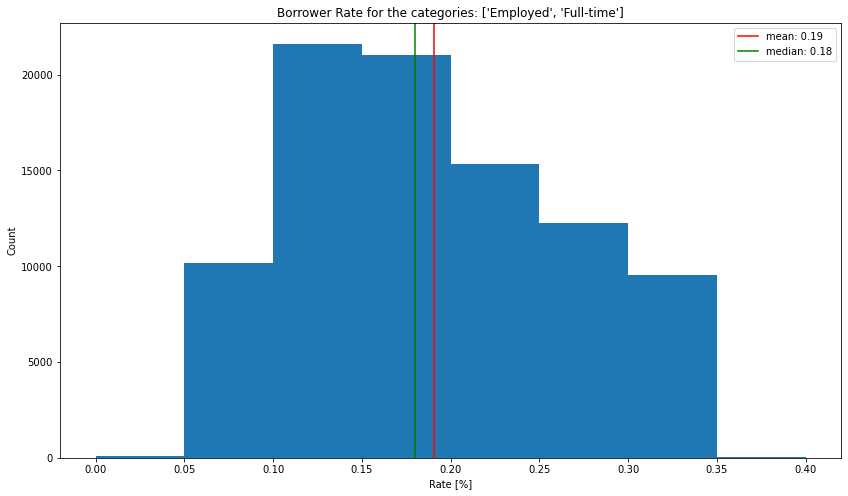

In [13]:
# Looking at the Borrower Rate for the full-time employments 
histo(df=df_employmentstatus_full, binsize = 0.05, column = "BorrowerRate", xlabel = "Rate [%]", ylabel = "Count", title = f"Borrower Rate for the categories: {list(set(df_employmentstatus_full.EmploymentStatus))}")

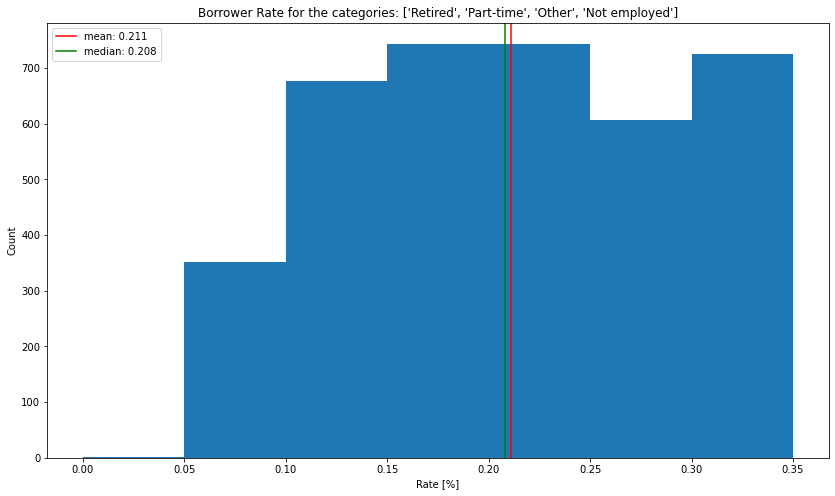

In [14]:
# Looking at the Borrower Rate for the full-time employments 
histo(df=df_employmentstatus, binsize = 0.05, column = "BorrowerRate", xlabel = "Rate [%]", ylabel = "Count", title = f"Borrower Rate for the categories: {list(set(df_employmentstatus.EmploymentStatus))}")

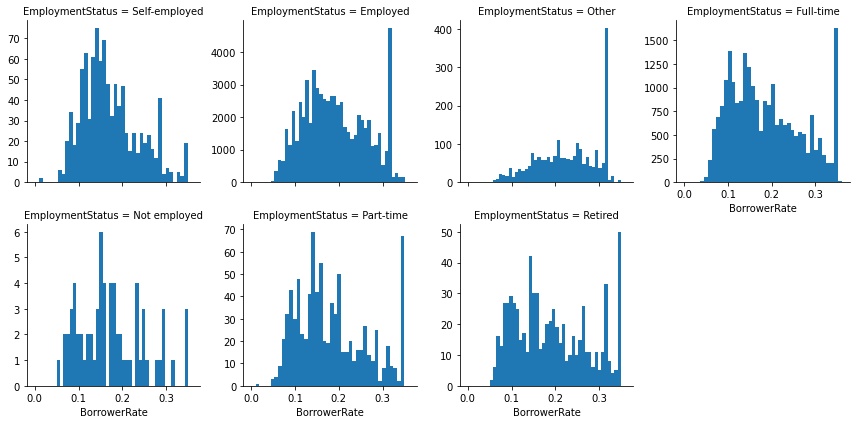

In [15]:
# Although this is more of a bivariate exploration, it seems relevant to visualize the different 
# distributions in each sub-category. 
g = sb.FacetGrid(data = df, col = 'EmploymentStatus', col_wrap=4, sharey=False)
g.map(plt.hist, 'BorrowerRate', bins = 40);

## Observation

> Employed people have in average generally lower borrower rate than unemployed

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> The variables used in the univariate exploration is: **LoanOriginalAmount**, **Occupation**, **LoanStatus**, **EmploymentStatus**, **BorrowerAPR**, **BorrowerRate**

## Question

> Is there any correlation between the mean Loan Original Amount and the EmploymentStatus/LoanStatus?

## Visualization

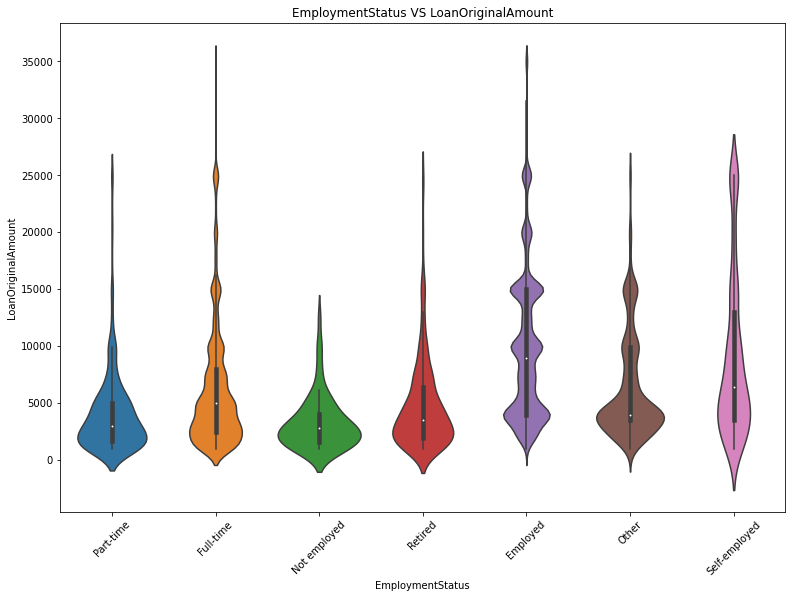

In [16]:
df_bivariate = df.copy()

def violin_plot(df, col_num, col_cat, title):
    vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=list(set(df_bivariate[col_cat])))
    df[col_cat] = df[col_cat].astype(vclasses);
    plt.figure(figsize = (13,9))
    plt.title(title)
    plot1 = sb.violinplot(data=df, x=col_cat, y=col_num);
    plot1.set_xticklabels(plot1.get_xticklabels(), rotation=45)

violin_plot(df = df_bivariate, col_num = "LoanOriginalAmount", col_cat = "EmploymentStatus", title = "EmploymentStatus VS LoanOriginalAmount")

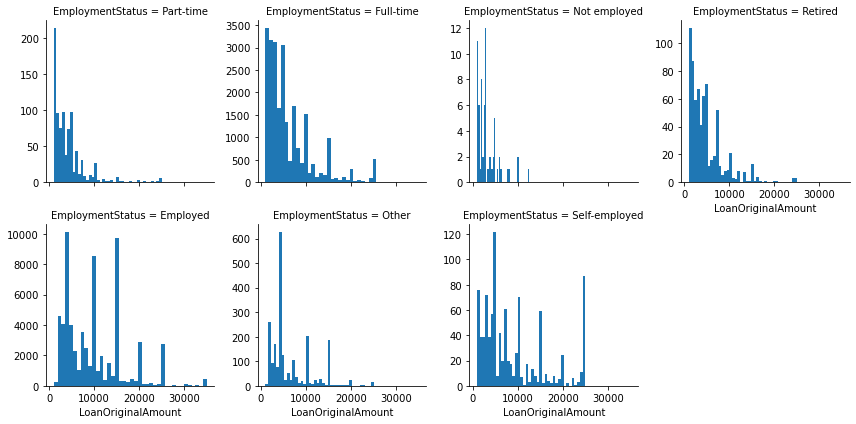

In [17]:
# Visualize the distributions for each category
g = sb.FacetGrid(data = df_bivariate, col = 'EmploymentStatus', col_wrap=4, sharey=False)
g.map(plt.hist, 'LoanOriginalAmount', bins = 40);

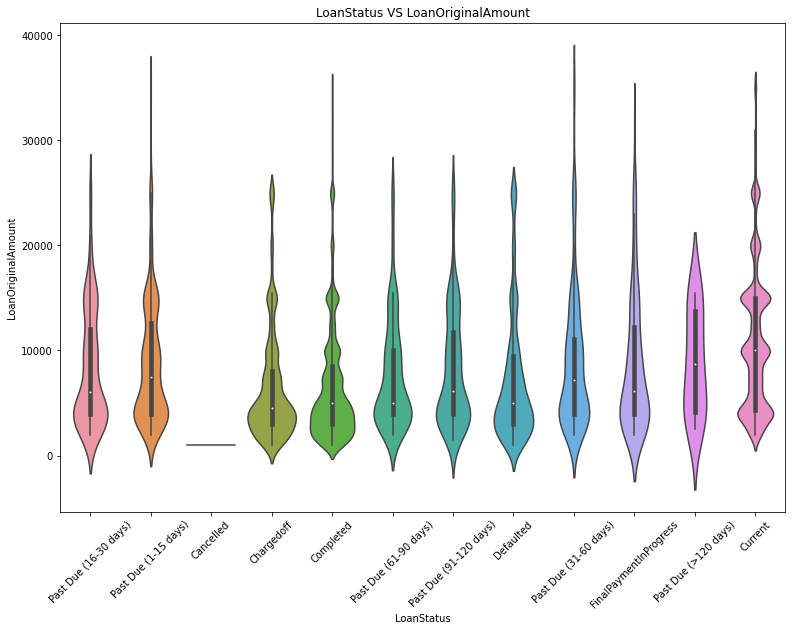

In [18]:
violin_plot(df = df_bivariate, col_num = "LoanOriginalAmount", col_cat = "LoanStatus", title = "LoanStatus VS LoanOriginalAmount")

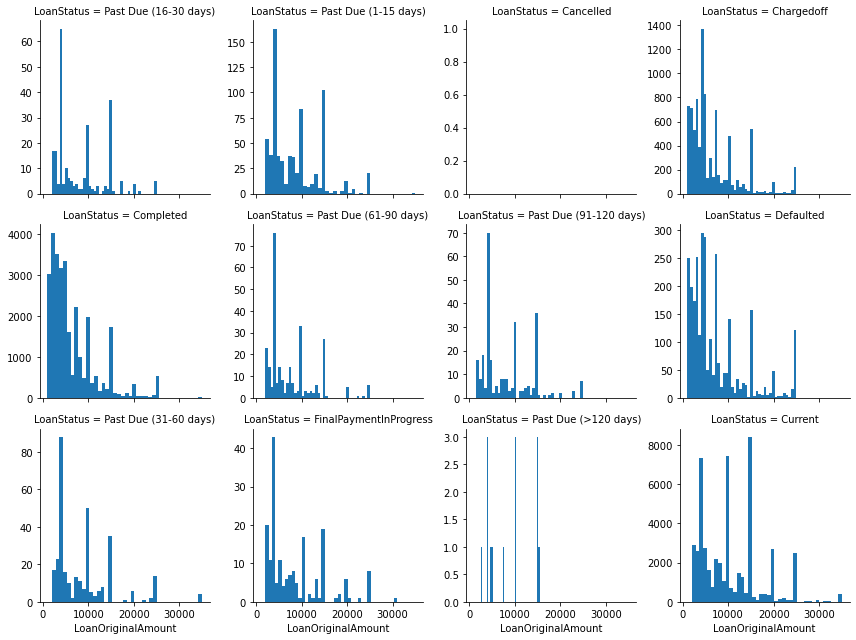

In [19]:
g = sb.FacetGrid(data = df_bivariate, col = 'LoanStatus', col_wrap=4, sharey=False)
g.map(plt.hist, 'LoanOriginalAmount', bins = 40);

## Observation

> First glance, verifying what we saw in the univariate exploration we can see that those that are employed have a larger variance, or spans, to a larger Original Loan compared to those who does not. 

> The distribution for the current loan status is more fragmented and have more local distributions among the numerical axis than the other categories.

## Question

> For exploration purposes: Are there any correlation between some numerical columns, arbitrarily selected?

## Visualization


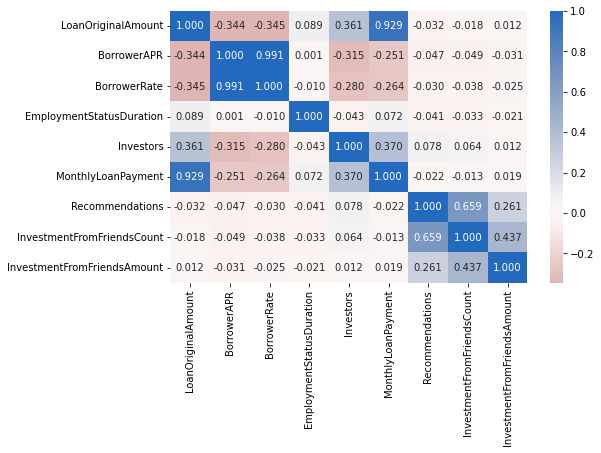

In [20]:
numeric_vars = ["LoanOriginalAmount", "BorrowerAPR", "BorrowerRate","EmploymentStatusDuration","Investors","MonthlyLoanPayment","Recommendations","InvestmentFromFriendsCount","InvestmentFromFriendsAmount"]
categoric_vars = ['Occupation', 'LoanStatus', 'EmploymentStatus']


plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()


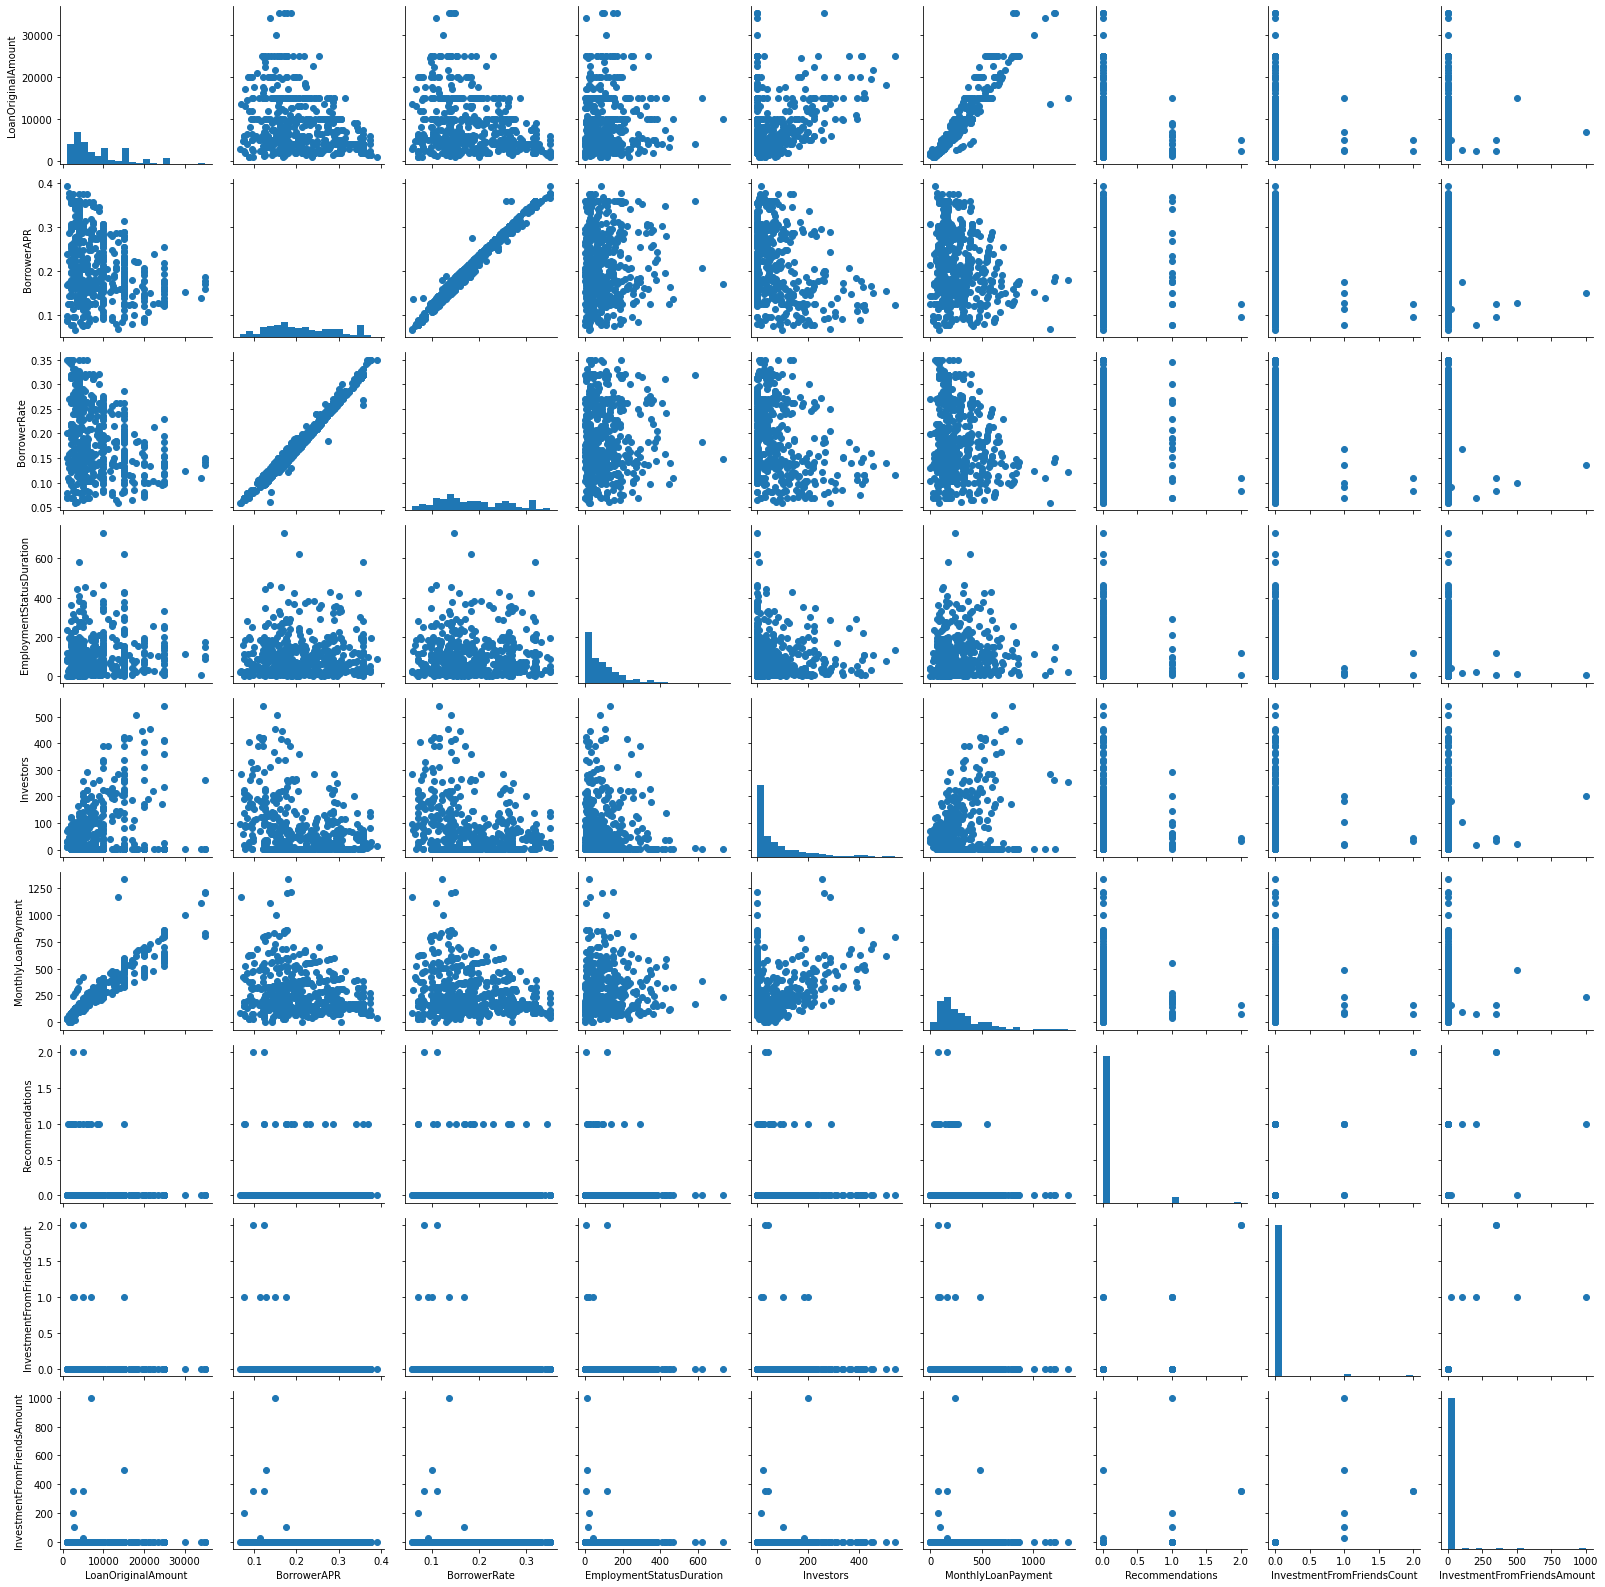

In [21]:
samples = np.random.choice(df.reset_index(drop=True).shape[0], 500, replace = False)
diamonds_samp = df.reset_index(drop=True).loc[samples,:]

g = sb.PairGrid(data = diamonds_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

## Observation

> BorrowerRate and BorrowerAPR have a near linear relationship, by examining the correlation coefficient of 0.991 and the pair plot. 

> MonthlyLoanPayment and LoanOriginalAmount also have a rather large correlation of 0.929. 

> Investors briefly increases the more LoanOriginalAmount increases (Presumably the casuation is the other way around, as the more investors you have, the larger the loan..?) This can also be seen in Investors-MonthlyLoanPayment, due to the large correlation between MonthlyLoanPayment and LoanOriginalAmount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We have found several interesting correlations, both negative and postive correlations. There are several features that doesn't seem to show any distinct correlation as a whole, but looking at those features (e.g., MonthlyLoanPayment and BorrowerAPR) we may distinguish some sub-correlations that might depend on other categories.

> We find a strong correlation between BorrowerRate-BorrowerAPR and MonthlyLoanPayment-LoanOriginalAmount

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> As speculated before: "Investors briefly increases the more LoanOriginalAmount increases" which could imply the other way around that the more investors a person acquires, the larger LoanOriginalAmount the person accumulates. 

> In the same fashion as the previous analysis, investors increases as MonthlyLoanPayment increases. Hypothetically: More investors -> Higher MonthlyLoanPayment.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Question

> As speculated earlier: Are there any category that explains the "sub-correlations" related to MonthlyLoanPayment and BorrowerAPR?

## Visualization

C:\Users\a373150\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


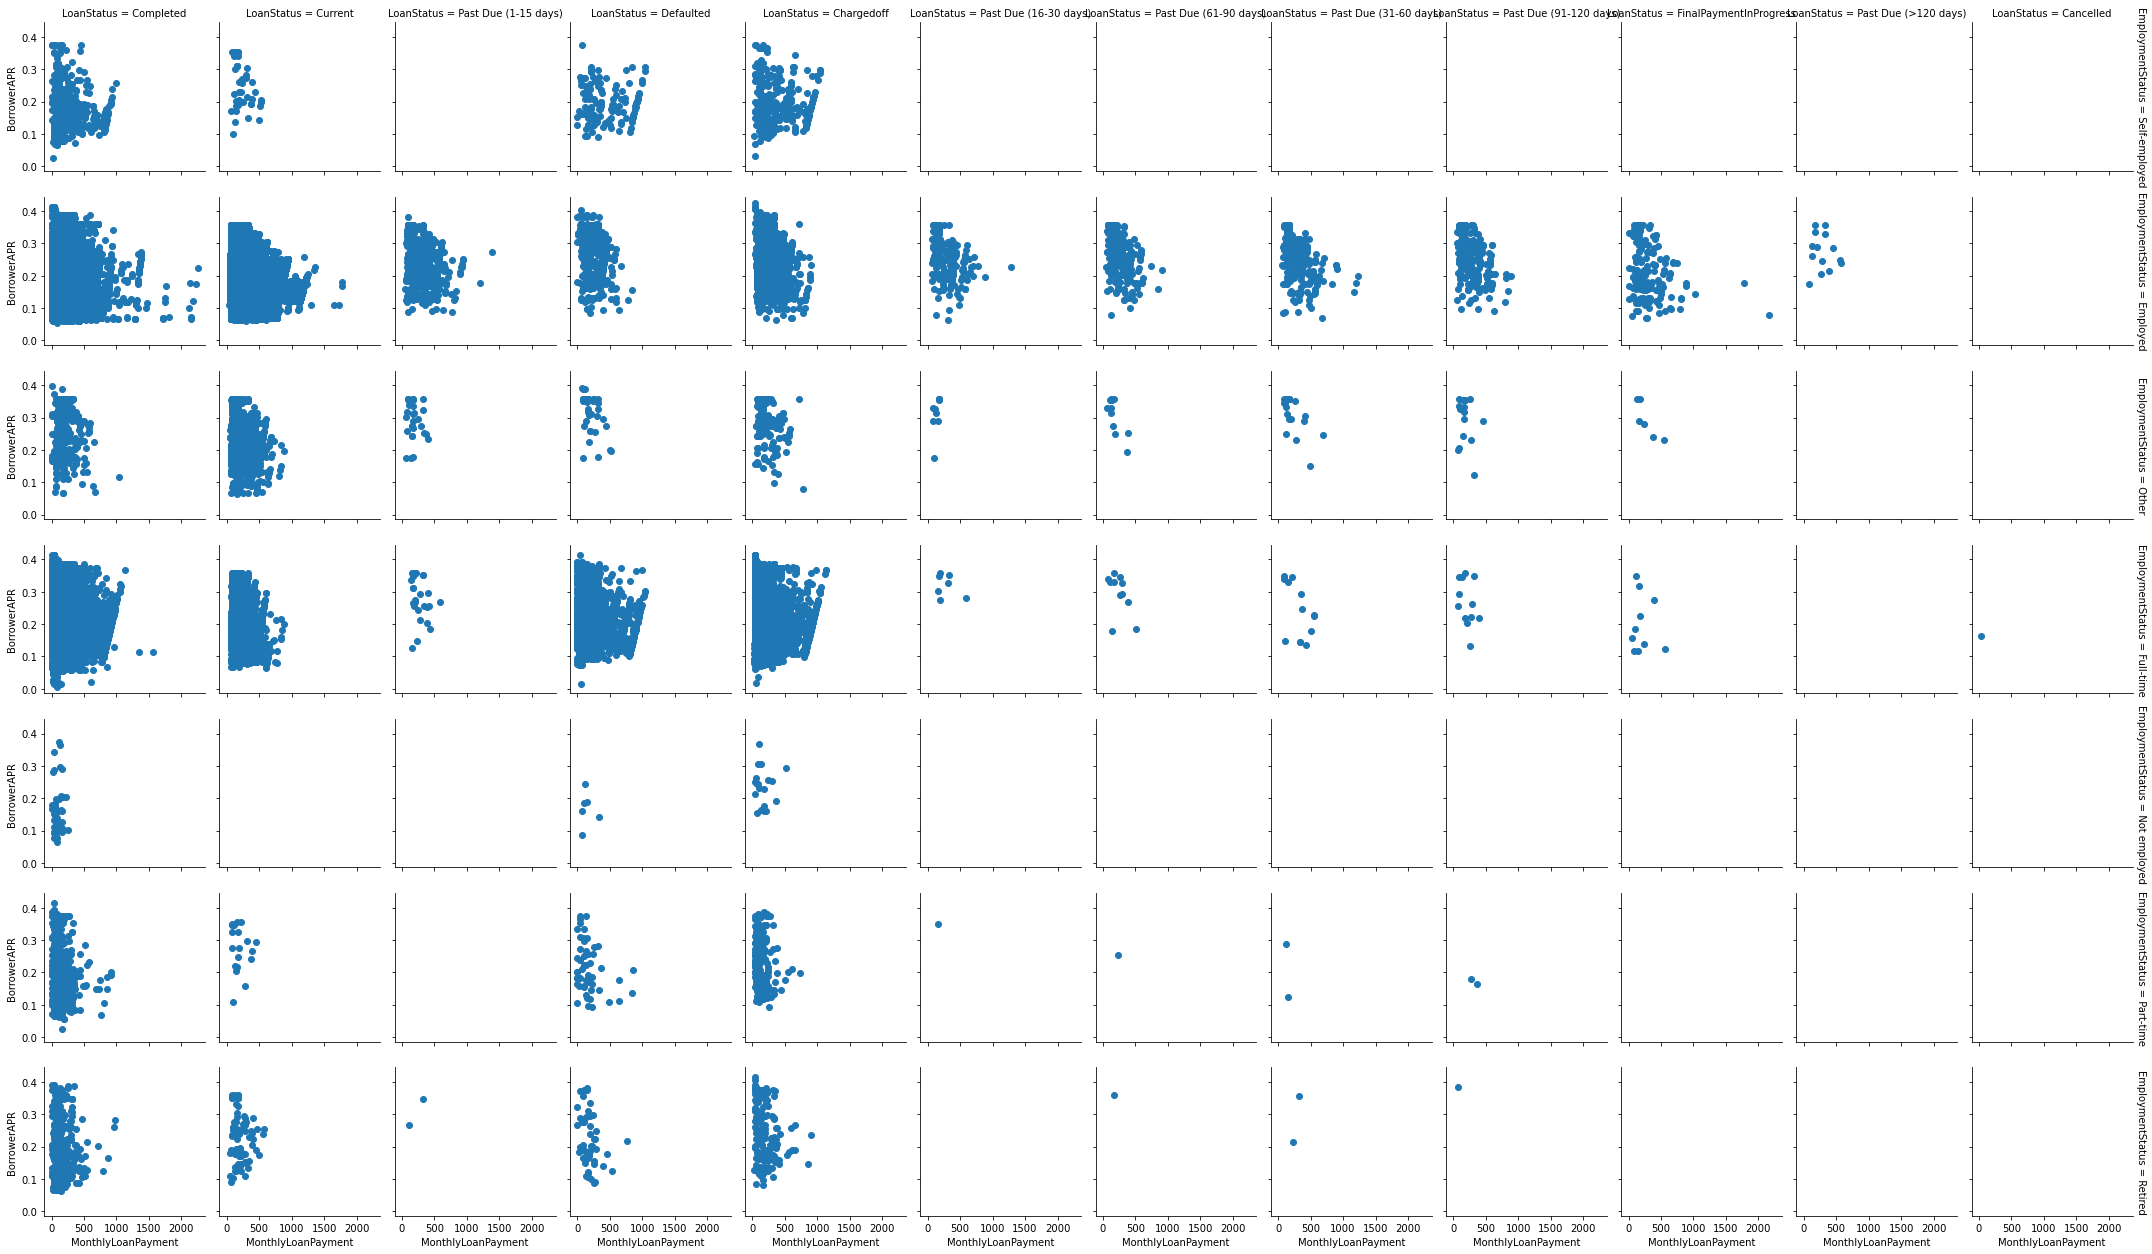

In [22]:
# Hard to figure out with this visual. Lets do some trial and error to see if we can explore some more.
# 'Occupation', 'LoanStatus', 'EmploymentStatus'
g = sb.FacetGrid(data = df, col = 'LoanStatus', row = 'EmploymentStatus', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'MonthlyLoanPayment', 'BorrowerAPR')


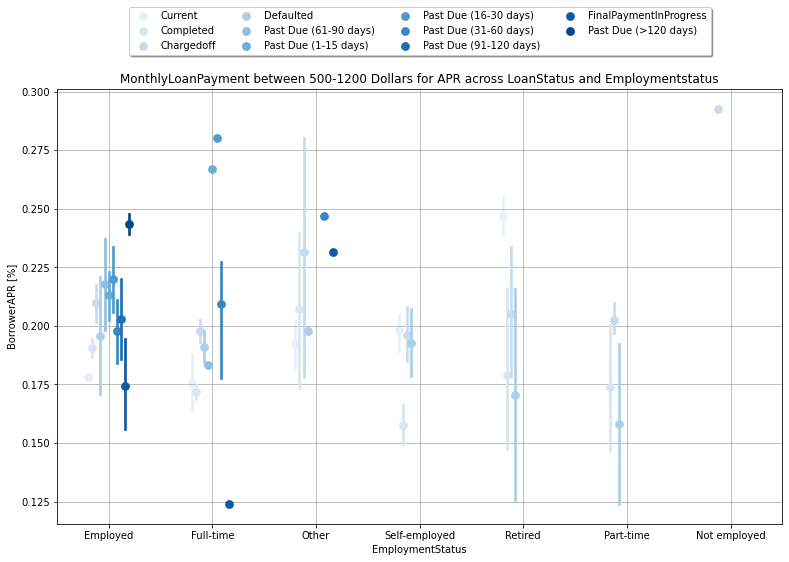

In [23]:
# Note that the x axis "EmploymentStatus" is not ordinal. Can we find an ordinal category which may describe the relation? 
# Now we limit the monthly loan payment to an interval and see if we notice anything. 
df_flag = (df['MonthlyLoanPayment'] >= 500) & (df['MonthlyLoanPayment'] <= 1200)
df_range = df.loc[df_flag,:]

fig = plt.figure(figsize = [13,8])
ax = sb.pointplot(data = df_range, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'LoanStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('MonthlyLoanPayment between 500-1200 Dollars for APR across LoanStatus and Employmentstatus')
plt.ylabel('BorrowerAPR [%]')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=4, fancybox=True, shadow=True)
plt.grid()
plt.show();


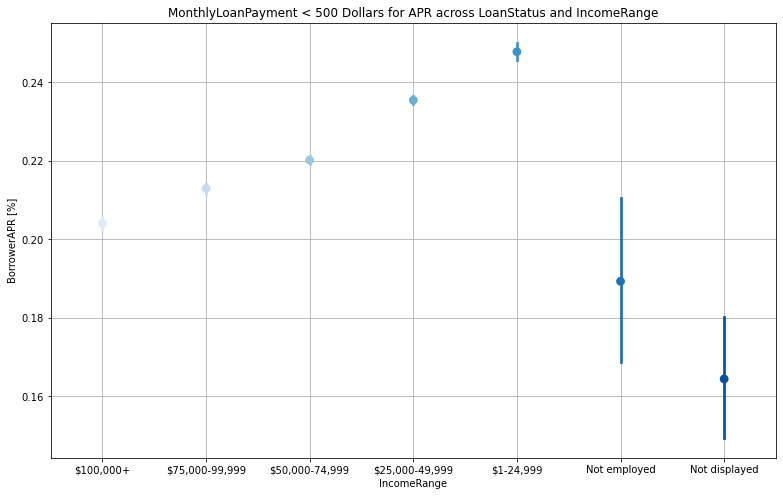

In [32]:
# Maybe "IncomeRange" will show any relationship when ordering the columns?
df_flag = (df['MonthlyLoanPayment'] < 500) 
df_range = df.loc[df_flag,:]

fig = plt.figure(figsize = [13,8])
ax = sb.pointplot(data = df_range, x = 'IncomeRange', y = 'BorrowerAPR', 
           palette = 'Blues', linestyles = '', dodge = 0.4, order=["$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not employed","Not displayed"])
plt.title('MonthlyLoanPayment < 500 Dollars for APR across LoanStatus and IncomeRange')
plt.ylabel('BorrowerAPR [%]')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
#           ncol=4, fancybox=True, shadow=True)
plt.grid()
plt.show();

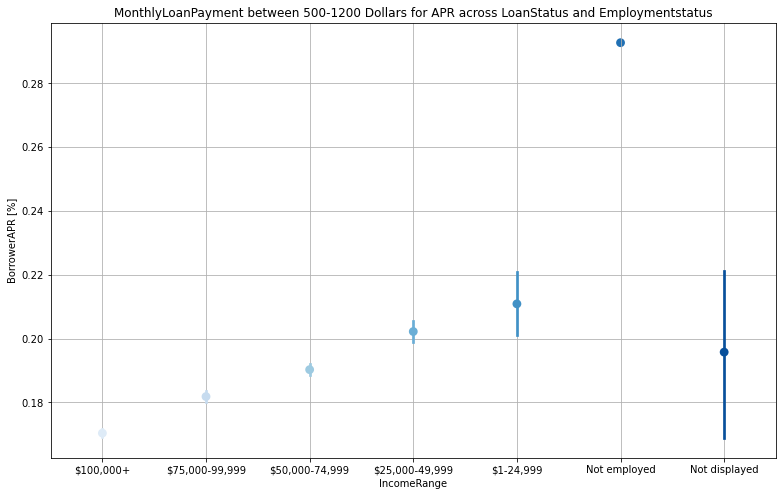

In [36]:
df_flag = (df['MonthlyLoanPayment'] >= 500) & (df['MonthlyLoanPayment'] <= 1200)
df_range = df.loc[df_flag,:]

fig = plt.figure(figsize = [13,8])
ax = sb.pointplot(data = df_range, x = 'IncomeRange', y = 'BorrowerAPR',
           palette = 'Blues', linestyles = '', dodge = 0.4, order=["$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not employed","Not displayed"])
plt.title('MonthlyLoanPayment between 500-1200 Dollars for APR across LoanStatus and Employmentstatus')
plt.ylabel('BorrowerAPR [%]')
ax.set_yticklabels([],minor = True)
plt.grid()
plt.show();

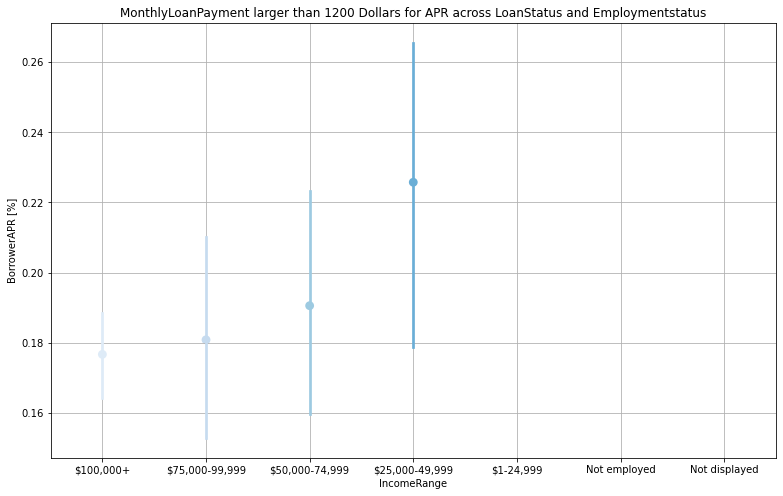

In [30]:

df_flag = (df['MonthlyLoanPayment'] >= 1200)
df_range = df.loc[df_flag,:]

fig = plt.figure(figsize = [13,8])
ax = sb.pointplot(data = df_range, x = 'IncomeRange', y = 'BorrowerAPR', 
           palette = 'Blues', linestyles = '', dodge = 0.4, order=["$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not employed","Not displayed"])
plt.title('MonthlyLoanPayment larger than 1200 Dollars for APR across LoanStatus and Employmentstatus')
plt.ylabel('BorrowerAPR [%]')
ax.set_yticklabels([],minor = True)
plt.grid()
plt.show();

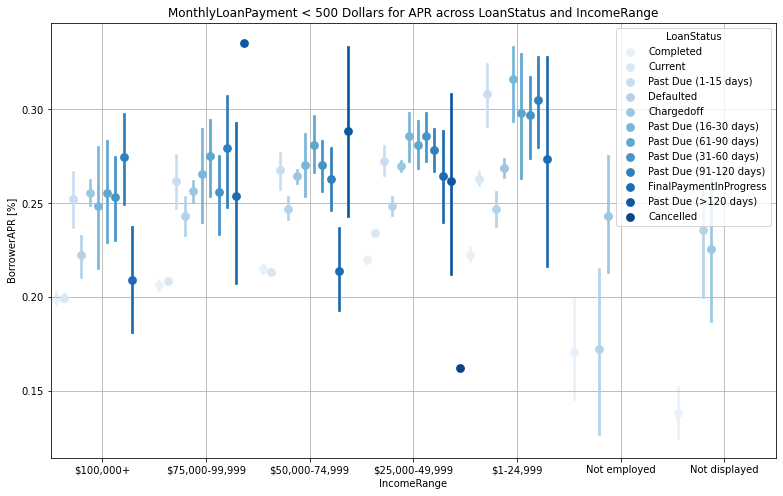

In [35]:
# If we include the loanstatus to lower montly paymens, can we observe a trend? 
df_flag = (df['MonthlyLoanPayment'] < 500) 
df_range = df.loc[df_flag,:]

fig = plt.figure(figsize = [13,8])
ax = sb.pointplot(data = df_range, x = 'IncomeRange', y = 'BorrowerAPR',  hue = "LoanStatus",
           palette = 'Blues', linestyles = '', dodge = 0.9, order=["$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not employed","Not displayed"])
plt.title('MonthlyLoanPayment < 500 Dollars for APR across LoanStatus and IncomeRange')
plt.ylabel('BorrowerAPR [%]')
# plt.yscale('log')
# plt.yticks([2e3, 4e3, 6e3, 1e4], ['2k', '4k', '6k', '10k'])
ax.set_yticklabels([],minor = True)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
#           ncol=4, fancybox=True, shadow=True)
plt.grid()
plt.show();

## Observation

> The ordinal category presents some insights in the BorrowerAPR relation loans with MonthlyLoanPayment between 500-1200 dollars. Loanstatus gives no easy way of getting insights if the status of the loans relates to the APR. 

> In general, looking and different income ranges: 500-1200 dollar, > 1200 dollar, IncomeRange and BorrowersAPR share a linear relationship in terms of the sorted ordinal category IncomeRange. In short, people that earn more get a lower APR in general.

> The variance of the different ranges vary a lot, where the MonthlyLoanPayment > 1200 dollars have a broad spread of values for each category. 

> We can summarize that the ordinal category IncomeRange can explain some sub-correlations between BorrowerAPR and MonthlyLoanPayment in terms of variance between the intervals of MonthlyLoanPayment

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Looking at some narrows intervals of a feature, this gave ideas to include another feature for analysis. The features did not strengthen each other that much, but gave some more exploratory depth and insights in the relationships. 

### Were there any interesting or surprising interactions between features?

> Depending on how much a person pay back each month, and the distribution of incomes, this affects the APR. The intervals of how much a person pay back vary in variance of the APR you will get. 

## Conclusions

> Employed people have in average generally lower borrower rate than unemployed which may be explained by that people that earn more get a lower APR in general.

> The spread of the APR is more tangible for lower incomes and denser the more you earn based on how much you pay each month back in mortgage and rate.  

> The non-informational category "Other" in the "Occupation" variable are among the top loan takers in this dataset. The category Professional, Computer programmer, Executive, Teacher and Analyst are among the top 5 loan takers. These categories are more prone to take a loan than other categories.

> We observe when filtering large loan takers that all of them do have an employment of any kind. Mostly they also have these loans as active and the top Occupations are Professional, Excecutive, Other, Computer Programmer, and Analyst

> In general, looking and different income ranges: 500-1200 dollar, > 1200 dollar, IncomeRange and BorrowersAPR share a linear relationship in terms of the sorted ordinal category IncomeRange. In short, people that earn more get a lower APR in general.

> The variance of the different ranges vary a lot, where the MonthlyLoanPayment > 1200 dollars have a broad spread of values for each category. 

> We can summarize that the ordinal category IncomeRange can explain some sub-correlations between BorrowerAPR and MonthlyLoanPayment in terms of variance between the intervals of MonthlyLoanPayment. This can be concluded as the variance of the BorrowerAPR increases with MonthlyLoanPayment.


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

